Sheyi Faparusi - cgz6qa

# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

**Answer:** I would define the most profitable item as the whatever has the best ratio of lowest cost for the state to highest cost for retail. (State Bottle Retail - State Bottle Cost) x Bottles Sold. That means they're making the most money from selling the liquor and getting a good return on their investment

So the most profitable item is: Titos Handmade Vodka

In [17]:
import numpy as np 
import pandas as pd

df = pd.read_csv('data/iowa.csv')
df["Category Name"].value_counts()


Category Name
AMERICAN VODKAS              16611
CANADIAN WHISKIES            15280
STRAIGHT BOURBON WHISKIES    10416
WHISKEY LIQUEUR               7789
SPICED RUM                    7379
                             ...  
ROCK & RYE                      14
LOW PROOF VODKA                 11
ANISETTE                         7
WHITE CREME DE MENTHE            6
AMARETTO - IMPORTED              2
Name: count, Length: 92, dtype: int64

In [43]:
#make a column for profit 
df['profit'] = df['Sale (Dollars)'] - df['State Bottle Cost']*df['Bottles Sold']
df['profit']

#group by item description and add up profits
group_df = df.groupby('Item Description')['profit'].sum()

#sort in descending order 
df_sorted = group_df.sort_values(ascending=False)
df_sorted.head() , df_sorted.tail()

(Item Description
 TITOS HANDMADE VODKA         361583.84
 BLACK VELVET                 274024.45
 FIREBALL CINNAMON WHISKEY    187554.54
 CROWN ROYAL                  160402.53
 CROWN ROYAL REGAL APPLE      122614.70
 Name: profit, dtype: float64,
 Item Description
 SIEMPRE ANEJO                   0.00
 99 MANGOES MINI               -16.20
 OLD ELK 10YR WHEAT WHISKEY    -32.50
 COLD SPELL MINT MINI DISCO   -118.58
 99 SOUR CHERRY MINI          -358.22
 Name: profit, dtype: float64)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gumdr\AppData\Local\Temp\ipykernel_21104\2519683559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profits.values, y=top_profits.index, palette="viridis", orient='h')


<Axes: ylabel='Item Description'>

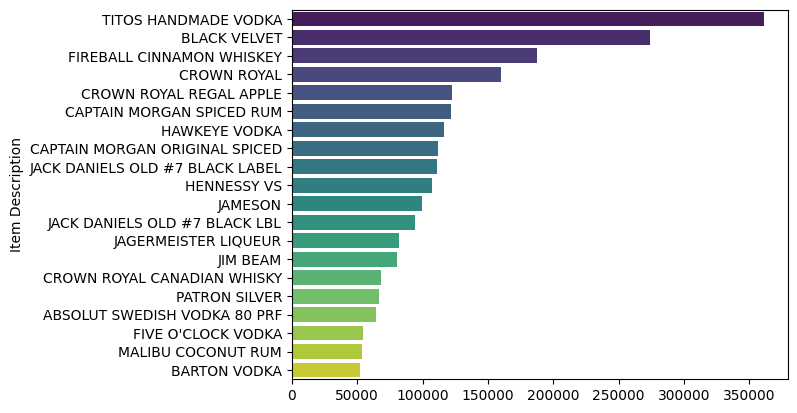

In [68]:
top_profits = df_sorted[:20]

sns.barplot(x=top_profits.values, y=top_profits.index, palette="viridis", orient='h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [ ]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [ ]:
x-y

In [74]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [75]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

**Answer:** when you try to subtract them you get an error that says they cant be broadcast together because they're different sizes/shapes

The first reshape gives you a 2x3 array of numbers 

The second reshape gives you  a 3x2 arrayy of numbers and is the transpose of the first reshape 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [4]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?